Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif
SNR: 59.251300667279196, CNR: 6.33734797971426
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif
SNR: 15.579693794250488, CNR: 6.232887268066406
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den0.png
SNR: 1.7672003269748484, CNR: 0.2968275524295676


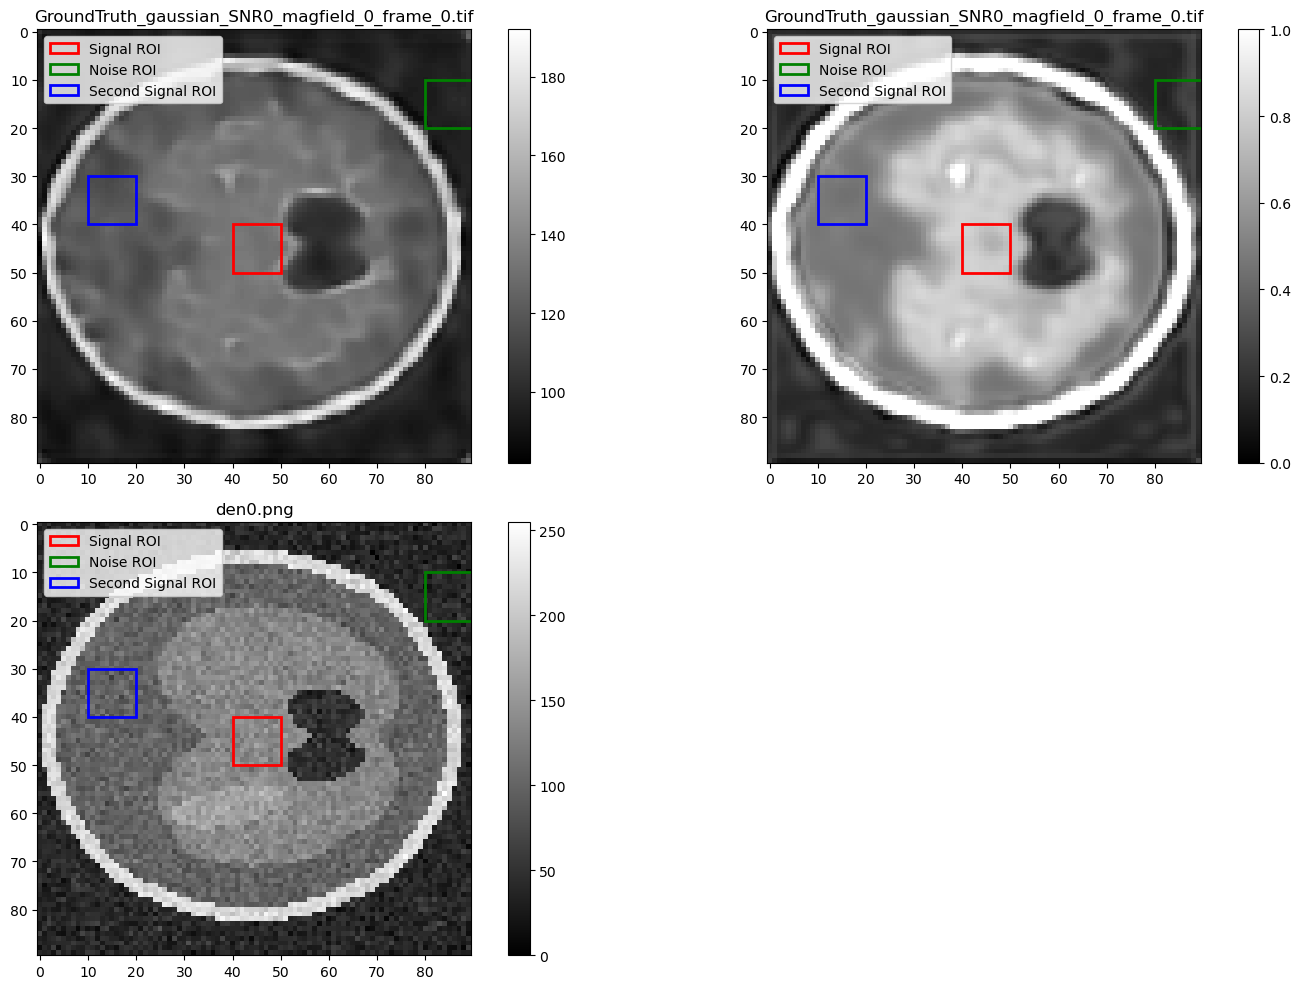

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian/GroundTruth_gaussian_SNR0_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den0.png'
]
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)


Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif
SNR: 97.93470499189961, CNR: 16.577297684787087
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif
SNR: 33.824615478515625, CNR: 12.670707702636719
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den5.png
SNR: 1.6689185966090954, CNR: 0.32068048275977395


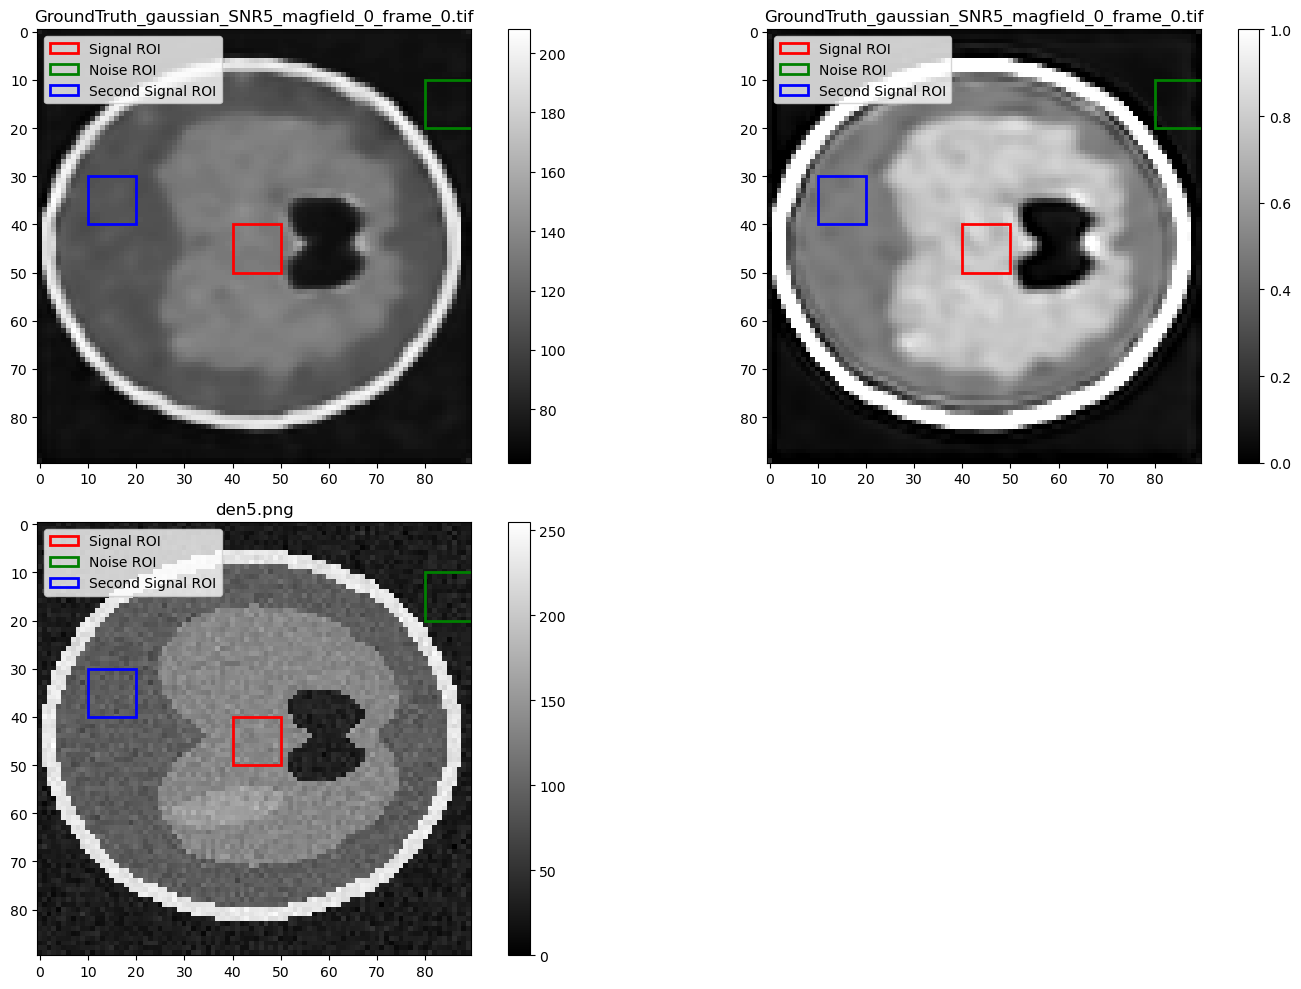

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian/GroundTruth_gaussian_SNR5_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den5.png'
]
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif
SNR: 97.09508584991589, CNR: 23.197906157218465
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif
SNR: 46.800689697265625, CNR: 20.43174171447754
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den10.png
SNR: 1.6064140244371292, CNR: 0.3415251080711615


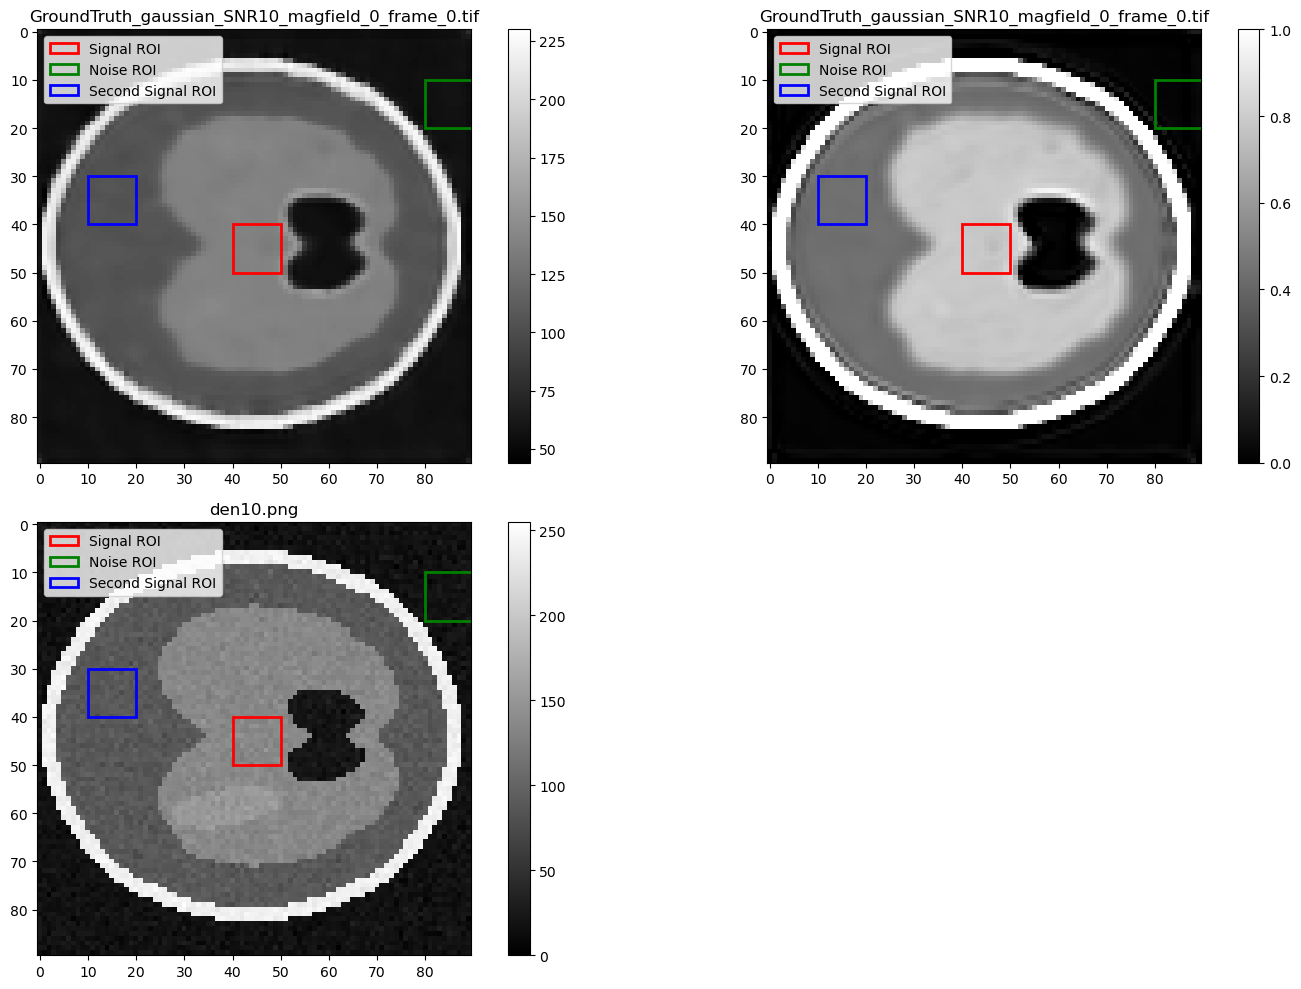

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Gaussian/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Gaussian/GroundTruth_gaussian_SNR10_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Gaussian/den10.png'
]
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)


Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician/GroundTruth_rician_SNR10_magfield_0_frame_0.tif
SNR: 112.18429386270472, CNR: 31.829308854782397
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician/GroundTruth_rician_SNR10_magfield_0_frame_0.tif
SNR: 6475.388671875, CNR: 2723.197509765625
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr10.png
SNR: 1.6064140244371292, CNR: 0.3415251080711615


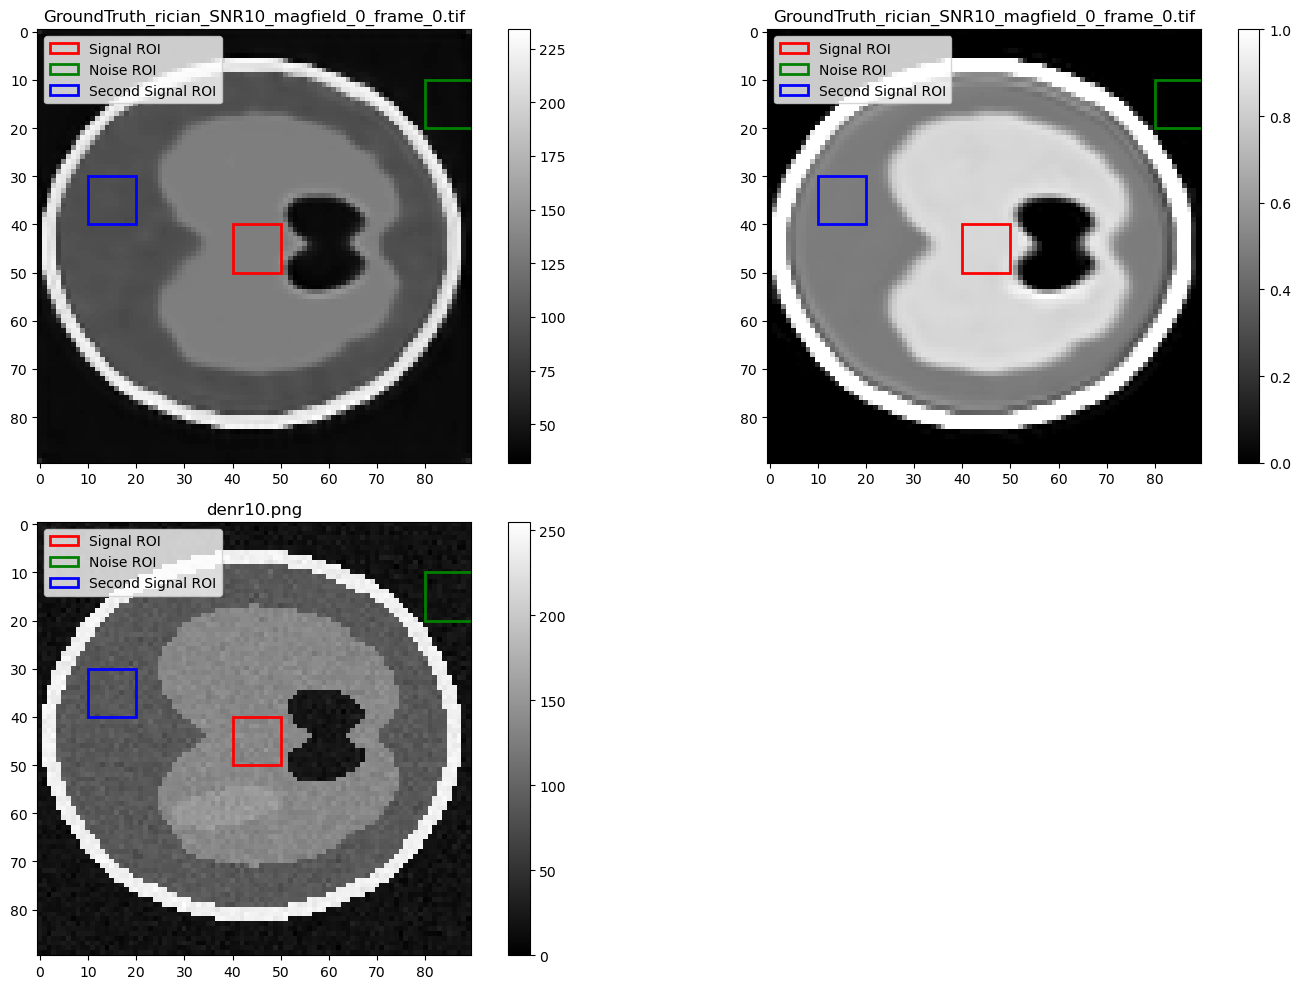

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician/GroundTruth_rician_SNR10_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician/GroundTruth_rician_SNR10_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr10.png'
]
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician/GroundTruth_rician_SNR0_magfield_0_frame_0.tif
SNR: 70.71892318107234, CNR: 8.814002713615215
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician/GroundTruth_rician_SNR0_magfield_0_frame_0.tif
SNR: 41.48090362548828, CNR: 16.878990173339844
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr0.png
SNR: 1.7672003269748484, CNR: 0.2968275524295676


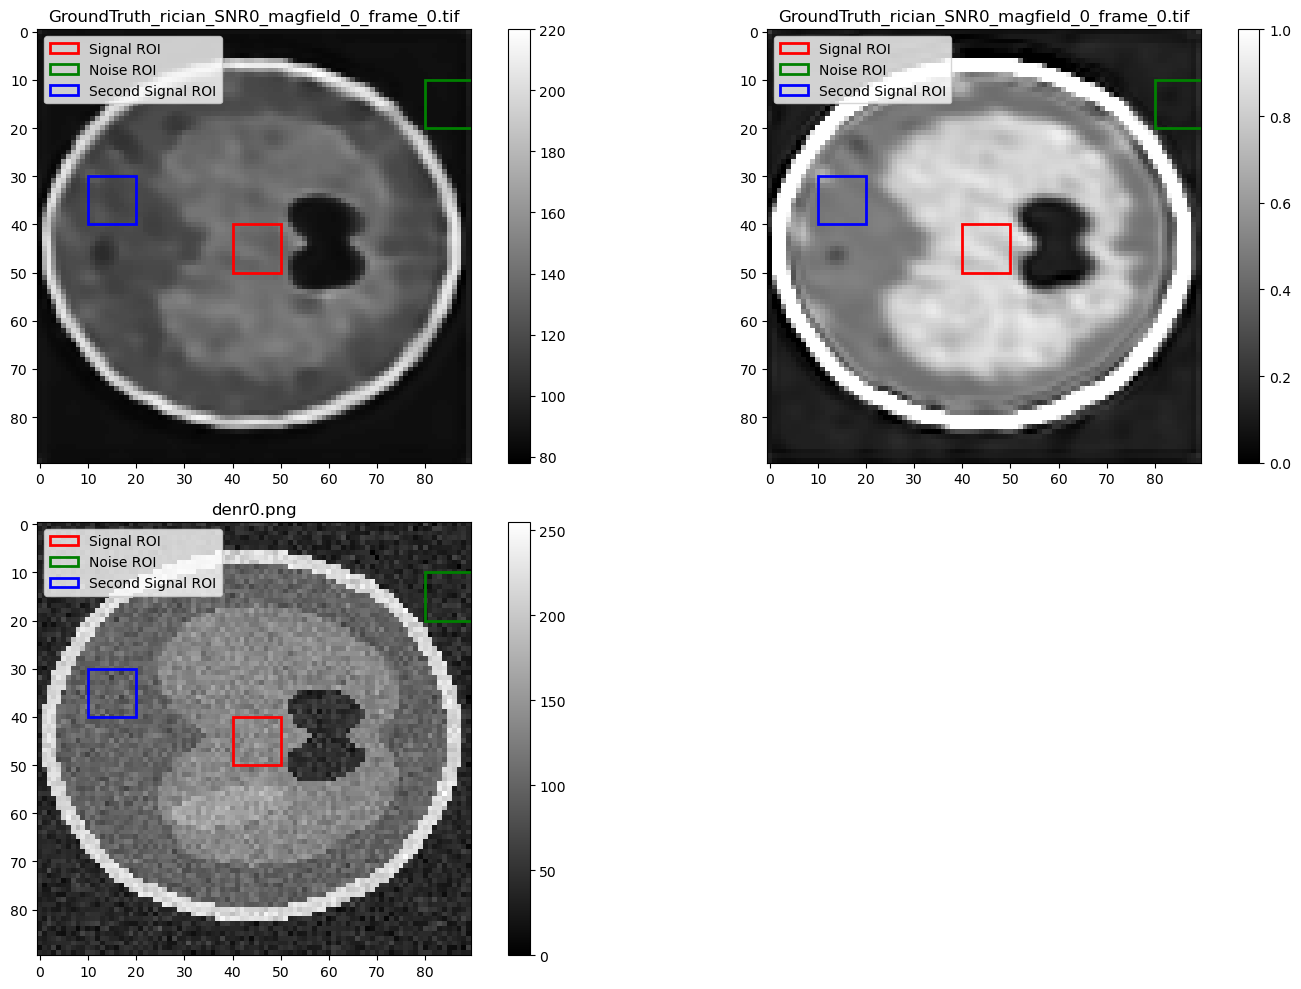

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician/GroundTruth_rician_SNR0_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician/GroundTruth_rician_SNR0_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr0.png'
]
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)

Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician/GroundTruth_rician_SNR5_magfield_0_frame_0.tif
SNR: 78.42122439574165, CNR: 17.646145531396787
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician/GroundTruth_rician_SNR5_magfield_0_frame_0.tif
SNR: 28.01930046081543, CNR: 9.92282485961914
Image: ../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr5.png
SNR: 1.6689185966090954, CNR: 0.32068048275977395


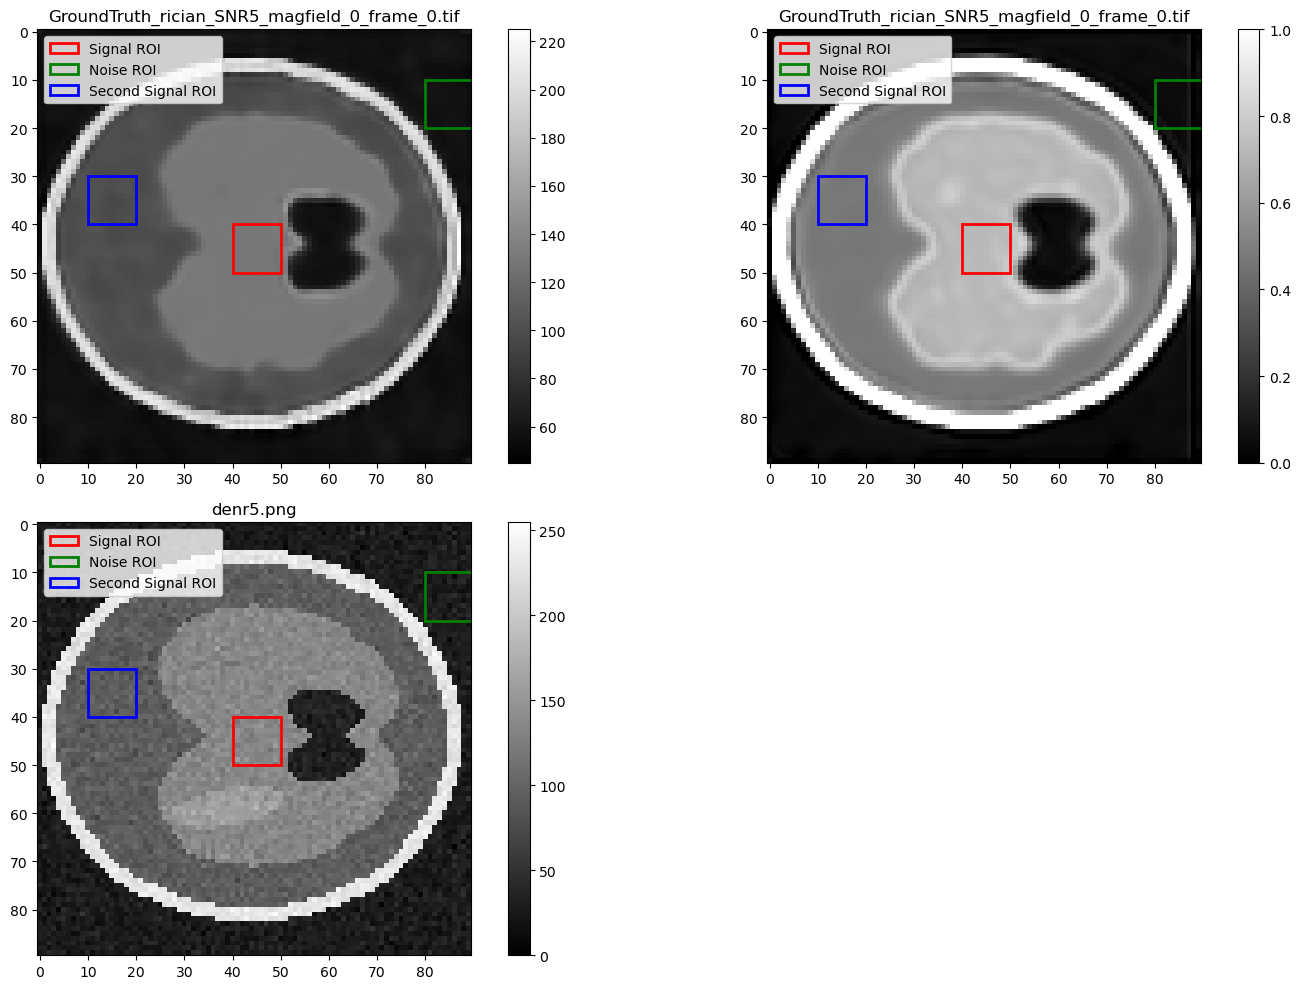

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords):
    """
    Calculates SNR and CNR for a given image with specified ROIs.

    Args:
        image_path (str): Path to the image file.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for CNR calculation.

    Returns:
        tuple: A tuple containing SNR and CNR values (SNR, CNR).
    """

    image = imread(image_path)

    # Adjust for grayscale (2D) or color (3D) images
    if image.ndim == 2:  # Grayscale image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width]
    else:  # Color image
        slice_func = lambda x, y, width, height: image[y:y + height, x:x + width, :]

    x, y, width, height = roi_coords
    roi_signal = slice_func(x, y, width, height)
    mean_signal = np.mean(roi_signal)

    x, y, width, height = noise_coords
    roi_noise = slice_func(x, y, width, height)
    std_noise = np.std(roi_noise)

    snr = mean_signal / std_noise if std_noise != 0 else np.inf

    x, y, width, height = roi2_coords
    roi2_signal = slice_func(x, y, width, height)
    mean_signal2 = np.mean(roi2_signal)

    cnr = (mean_signal - mean_signal2) / std_noise if std_noise != 0 else np.inf

    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords):
    """
    Visualizes all images with ROIs highlighted.

    Args:
        image_paths (list): List of paths to image files.
        roi_coords (tuple): Coordinates (x, y, width, height) of the signal ROI.
        noise_coords (tuple): Coordinates (x, y, width, height) of the noise ROI.
        roi2_coords (tuple): Coordinates (x, y, width, height) of the second signal ROI for visualization.
    """

    num_images = len(image_paths)
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows

    plt.figure(figsize=(15, nrows * 5))  # Adjust the figure size as needed

    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)

        # Check the dimension of the image and adjust accordingly
        if image.ndim == 2:  # Grayscale image
            plt.imshow(image, cmap='gray')
        else:  # Color image, displaying the first channel
            plt.imshow(image[:, :, 0], cmap='gray')

        plt.colorbar()

        # Draw the ROIs
        plt.gca().add_patch(plt.Rectangle((roi_coords[0], roi_coords[1]), roi_coords[2], roi_coords[3], edgecolor='red', facecolor='none', linewidth=2, label='Signal ROI'))
        plt.gca().add_patch(plt.Rectangle((noise_coords[0], noise_coords[1]), noise_coords[2], noise_coords[3], edgecolor='green', facecolor='none', linewidth=2, label='Noise ROI'))
        plt.gca().add_patch(plt.Rectangle((roi2_coords[0], roi2_coords[1]), roi2_coords[2], roi2_coords[3], edgecolor='blue', facecolor='none', linewidth=2, label='Second Signal ROI'))

        # Set labels for ROIs
        plt.legend()

        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_N2F/Rician/GroundTruth_rician_SNR5_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_noise2self/Rician/GroundTruth_rician_SNR5_magfield_0_frame_0.tif',
    '../Experiments/DenoisedImages/MachineLearningMethod_Simulation/SimulationMatlab_patch2self/Rician/denr5.png'
]
roi_coords = (40, 40, 10, 10)
noise_coords = (80, 10, 10, 10)
roi2_coords = (10, 30, 10, 10)

for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")

visualize_all_rois(image_paths, roi_coords, noise_coords, roi2_coords)